

# AMLS Assignment
## Task A_2: BASE CNN on BreastMNIST Dataset

Explore CNN based classifiers on the BreastMNIST dataset.

## Import libraries
The required libraries for this notebook include numpy, matplotlib, tensorflow, medmnist and also a custom built dataload and utility library.

In [26]:
## first enable autoreload during development so latest (new) version local code library is reloaded on execution 
## can be commented out when local code development not happening to avoid overhead
%load_ext autoreload
%autoreload 2

## import libraries
import io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
## import tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.losses import BinaryCrossentropy
## sklearn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## local code library
import AMLS_common as ac

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Set base parameters
Including hyper parameters and environment specifics

In [27]:
## Initialize parameters
parameter = ac.HyperParameters(learning_rate=0.01, 
                               kernel_size=3, 
                               num_epochs=50, 
                               num_filter=64,
                               dropout_rate=0.2,
                               optimise="Adam",
                               loss="binary_crossentropy",
                               default_activation="relu")
## initialise tqdm callback
tqdm_callback = ac.TqdmEpochProgress(total_epochs=parameter.num_epochs)
batch_size = 128
filebase   = "metrics/"          ## where to store file outputs
verbose    = 1                   ## if value equals 1 then print additional process information in steps below

## Load and preprocess the BreastMNIST Data
We load the dataset.

In [28]:
## Loading the data file using custom MedMINST loader
## data set specific name and then use common library to 
data_flag  = 'breastmnist'       ## defines which dataset to load
result_set = ac.medMNIST_load(data_flag,batch_size)

## check that the loader returned data correctly and then split out
if result_set != []:
    train_dataset = result_set[0]
    test_dataset  = result_set[1]
    val_dataset   = result_set[2]

if verbose == 1:
    ## print out information on training dataset if verbose set
    print("\nSummary metrics for train_dataset")
    print("type:",type(train_dataset))
    print("length:",len(train_dataset))
    print("shape:",train_dataset)

Using downloaded and verified file: C:\Users\johnc\.medmnist\breastmnist.npz
Using downloaded and verified file: C:\Users\johnc\.medmnist\breastmnist.npz
Using downloaded and verified file: C:\Users\johnc\.medmnist\breastmnist.npz

Summary metrics for train_dataset
type: <class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
length: 5
shape: <BatchDataset shapes: ((None, 28, 28, 1), (None, 1)), types: (tf.float64, tf.float32)>


## Define the CNN model

In [29]:
## Define the model
if verbose == 1:
    print("Default activation is ",parameter.default_activation)

## Define base model
model = Sequential([
    Conv2D(32, (3, 3), activation=parameter.default_activation, input_shape=(28, 28, 1)),  ## Input layer
    Conv2D(32, (3, 3), activation=parameter.default_activation),                           ## Initial convolution layer
    MaxPooling2D((2, 2)),                                                                  ## Down-sample the feature maps
    Dropout(0.1),                                                                          ## Drop out to reduce possible over fitting
    Conv2D(16, (3, 3), activation=parameter.default_activation),                           ## Another convolution layer
    MaxPooling2D((2, 2)),                                                                  ## Down-sample the feature maps
    Conv2D(16, (3, 3), activation=parameter.default_activation),                           ## Another convolution layer
    MaxPooling2D((2, 2)),                                                                  ## Down-sample the feature maps
    Flatten(),                                                                             ## Flatten
    Dense(64, activation=parameter.default_activation),                                    ## Fully connected layer
    Dropout(0.2),                                                                          ## Drop out to reduce possible over fitting
    Dense(1, activation='sigmoid')                                                         ## Output layer for binary classification  
])

if verbose == 1:
    print(model.summary())
## Redirect the summary output to a string
summary_string = io.StringIO()
model.summary(print_fn=lambda x: summary_string.write(x + "\n"))
summary_content = summary_string.getvalue()
summary_string.close()

Default activation is  relu
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 10, 10, 16)        4624      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_23 (Conv2D)        

## Fit the model

Epoch Progress: 100%|██████████| 50/50 [00:22<00:00,  2.25epoch/s, loss=0.345, acc=0.85, val_loss=0.365, val_acc=0.846] 


['loss', 'acc', 'val_loss', 'val_acc'] <tensorflow.python.keras.callbacks.History object at 0x000001C9D5A5D4C0>


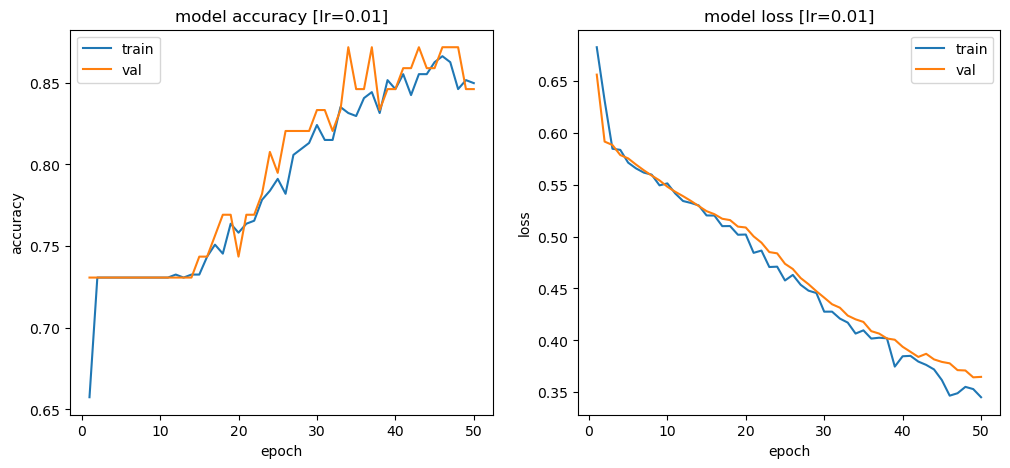

for model
 Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 10, 10, 16)        4624      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 3, 3, 1

['metrics/metrics_2025_01_01_at_140828.xlsx',
 'metrics/summary_2025_01_01_at_140828.txt',
 RunResult(min_loss=0.34533166885375977, max_acc=0.8663003444671631, last_loss=0.34533166885375977, last_acc=0.8498168587684631, min_val_loss=0.3644765019416809, max_val_acc=0.8717948794364929, last_val_loss=0.36491283774375916, last_val_acc=0.8461538553237915, var_loss=0.006898825515066723, var_acc=0.002866688349327523),
 HyperParameters(learning_rate=0.01, kernel_size=3, num_epochs=50, optimise='Adam', loss='binary_crossentropy', num_filter=64, strides=1, padding='valid', dropout_rate=0.2, layers=3, default_activation='relu')]

In [30]:
## set up optimizer with learning rate from hyperparameter structure
##optimizer_choice = str(parameter.optimise)+'(learning_rate='+str(parameter.learning_rate)+')'
##optimizer        = eval(optimizer_choice)
## programatic setting of loss parameter needs more work - not used yet
##loss_choice      = str(parameter.loss)
##loss             = eval(loss_choice)

## how do I update the loss programmatically like learning rate?
model.compile(optimizer=parameter.optimise,                                                   
              loss=parameter.loss,
              metrics='acc')

## Fit the model
history = model.fit(train_dataset, 
                    validation_data=val_dataset, 
                    epochs=parameter.num_epochs, 
                    batch_size=batch_size, 
                    verbose=0,
                    callbacks = [tqdm_callback])

## TEMP DEVELOPMENT PRINTS
print(list(history.history.keys()),history)
## output graphically and also save to files
ac.graph_and_save(history,summary_content,parameter,filebase) ## returns [filename_h,filename_s,run_result,parameter] as structure
